In [1]:
# Import Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

Load the Data


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
test=pd.read_csv('/content/drive/MyDrive/ML Dataset/test_cab_fare.csv')
train=pd.read_csv('/content/drive/MyDrive/ML Dataset/train_cab_fare.csv')
cab=pd.concat([test,train])

In [4]:
cab.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1.0,NaN
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1.0,NaN
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1.0,NaN
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1.0,NaN
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1.0,NaN


In [5]:
cab.isnull()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
16062,False,False,False,False,False,False,False
16063,False,False,False,False,False,False,False
16064,False,False,False,False,False,False,False
16065,False,False,False,False,False,False,False


In [6]:
cab.isnull().sum()

pickup_datetime         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
passenger_count        55
fare_amount          9938
dtype: int64

In [7]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25981 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    25981 non-null  object 
 1   pickup_longitude   25981 non-null  float64
 2   pickup_latitude    25981 non-null  float64
 3   dropoff_longitude  25981 non-null  float64
 4   dropoff_latitude   25981 non-null  float64
 5   passenger_count    25926 non-null  float64
 6   fare_amount        16043 non-null  object 
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [8]:
cab.shape


(25981, 7)

In [9]:
cab.describe().T

,count,mean,std,min,25%,50%,75%,max
pickup_longitude,25981.0,-73.039721,8.351068,-74.438233,-73.992300,-73.981985,-73.967273,40.766125
pickup_latitude,25981.0,40.233852,5.383706,-74.006893,40.735394,40.752786,40.767281,401.083332
dropoff_longitude,25981.0,-73.039030,8.348433,-74.429332,-73.991210,-73.980119,-73.963777,40.802437
dropoff_latitude,25981.0,40.223719,4.883120,-74.006377,40.734953,40.753738,40.768339,41.696683
passenger_count,25926.0,2.260342,47.824259,0.000000,1.000000,1.000000,2.000000,5345.000000


Data Preprocessing

In [10]:
cab['passenger_count'].value_counts()

1.00       18173
2.00        3796
5.00        1741
3.00        1123
4.00         535
6.00         479
0.00          57
43.00          2
53.00          2
537.00         1
58.00          1
531.20         1
87.00          1
5345.00        1
1.30           1
0.12           1
536.00         1
554.00         1
345.00         1
35.00          1
55.00          1
354.00         1
535.00         1
5334.00        1
456.00         1
236.00         1
557.00         1
Name: passenger_count, dtype: int64

In [11]:
cab['fare_amount'].sort_values(ascending=False)

12915     96
7810      95
39       9.8
7331     9.8
6254     9.7
        ... 
1712     NaN
2412     NaN
2458     NaN
8178     NaN
8226     NaN
Name: fare_amount, Length: 25981, dtype: object

In [12]:
cab['pickup_datetime']=pd.to_datetime(cab['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC',errors='coerce')
cab.head(10)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1.0,NaN
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1.0,NaN
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1.0,NaN
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1.0,NaN
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1.0,NaN
5,2012-12-01 21:12:12,-73.960983,40.765547,-73.979177,40.740053,1.0,NaN
6,2011-10-06 12:10:20,-73.949013,40.773204,-73.959622,40.770893,1.0,NaN
7,2011-10-06 12:10:20,-73.777282,40.646636,-73.985083,40.759368,1.0,NaN
8,2011-10-06 12:10:20,-74.014099,40.709638,-73.995106,40.741365,1.0,NaN
9,2014-02-18 15:22:20,-73.969582,40.765519,-73.980686,40.770725,1.0,NaN


In [13]:
pip install missingno


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import missingno as msno

<AxesSubplot:>

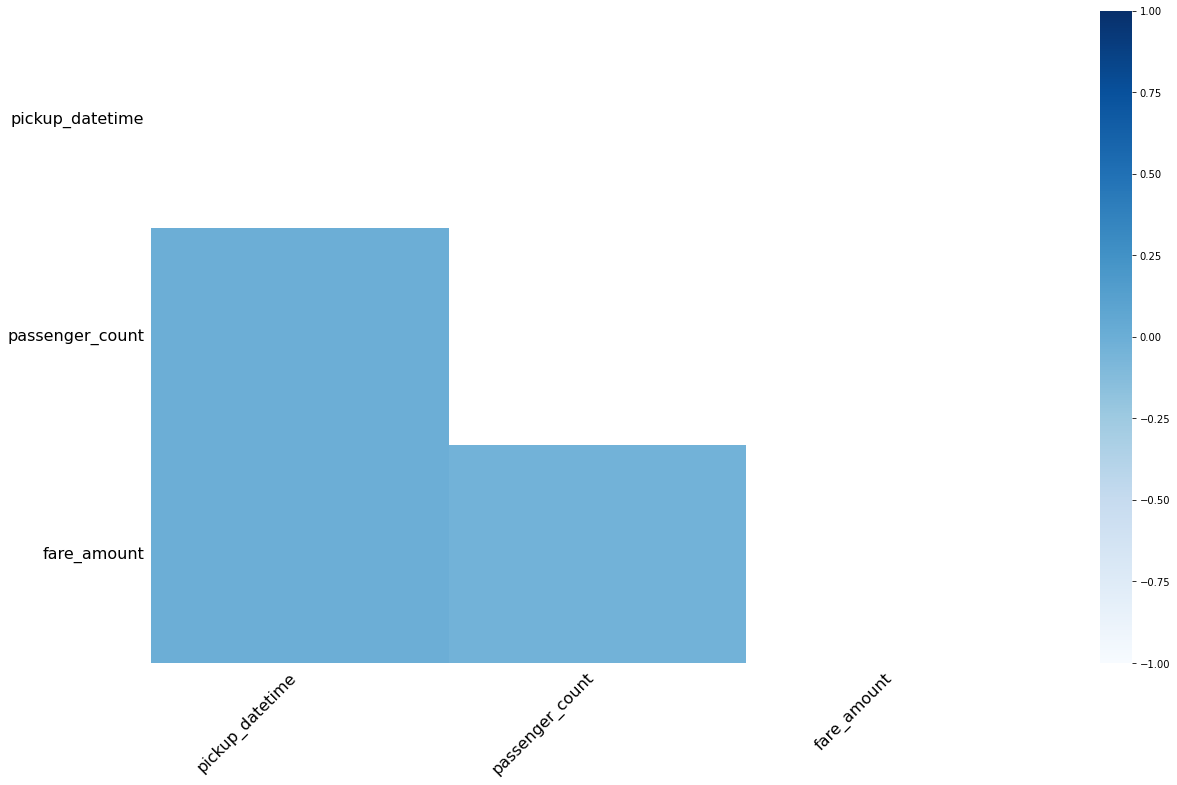

In [15]:
msno.heatmap(cab,cmap="Blues")

In [16]:
(cab[['passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_longitude','fare_amount']]==0).sum()

passenger_count       57
pickup_longitude     315
pickup_latitude      315
dropoff_longitude    314
dropoff_longitude    314
fare_amount            0
dtype: int64

In [17]:
cab['fare_amount']=cab['fare_amount'].apply(pd.to_numeric,errors='coerce')
cab['fare_amount']=cab['fare_amount'].replace({0:np.nan})

In [18]:
cab['passenger_count']=cab['passenger_count'].fillna(0)
cab['passenger_count']=cab['passenger_count'].astype(int)
cab['passenger_count']=cab['passenger_count'].replace({0:np.nan})

In [19]:
cab['pickup_longitude']=cab['pickup_longitude'].replace({0:np.nan})
cab['pickup_latitude']=cab['pickup_latitude'].replace({0:np.nan})

In [20]:
cab['dropoff_longitude']=cab['dropoff_longitude'].replace({0:np.nan})
cab['dropoff_latitude']=cab['dropoff_latitude'].replace({0:np.nan})

In [21]:
cab.isnull()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
16062,False,False,False,False,False,False,False
16063,False,False,False,False,False,False,False
16064,False,False,False,False,False,False,False
16065,False,False,False,False,False,False,False


In [22]:
cab.isnull().sum()

pickup_datetime         1
pickup_longitude      315
pickup_latitude       315
dropoff_longitude     314
dropoff_latitude      312
passenger_count       113
fare_amount          9940
dtype: int64

In [23]:
cab.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
count,25666.000000,25666.000000,25667.000000,25669.000000,25868.000000,16041.000000
mean,-73.936141,40.727644,-73.932561,40.712627,2.265386,15.015940
std,2.077473,3.037805,2.117878,2.056492,47.877641,430.474347
min,-74.438233,-74.006893,-74.429332,-74.006377,1.000000,-3.000000
25%,-73.992428,40.736346,-73.991323,40.735872,1.000000,6.000000
50%,-73.982142,40.753219,-73.980390,40.754167,1.000000,8.500000
75%,-73.968052,40.767532,-73.964904,40.768546,2.000000,12.500000
max,40.766125,401.083332,40.802437,41.696683,5345.000000,54343.000000


In [24]:
cab['fare_amount']=cab['fare_amount'].fillna(cab['fare_amount'].mean())
cab['pickup_longitude']=cab['pickup_longitude'].fillna(cab['pickup_longitude'].mean())
cab['pickup_latitude']=cab['pickup_latitude'].fillna(cab['pickup_latitude'].mean())
cab['dropoff_longitude']=cab['dropoff_longitude'].fillna(cab['dropoff_longitude'].mean())
cab['dropoff_latitude']=cab['dropoff_latitude'].fillna(cab['dropoff_latitude'].mean())

In [25]:
cab=cab.dropna()

In [26]:
cab.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
fare_amount          0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

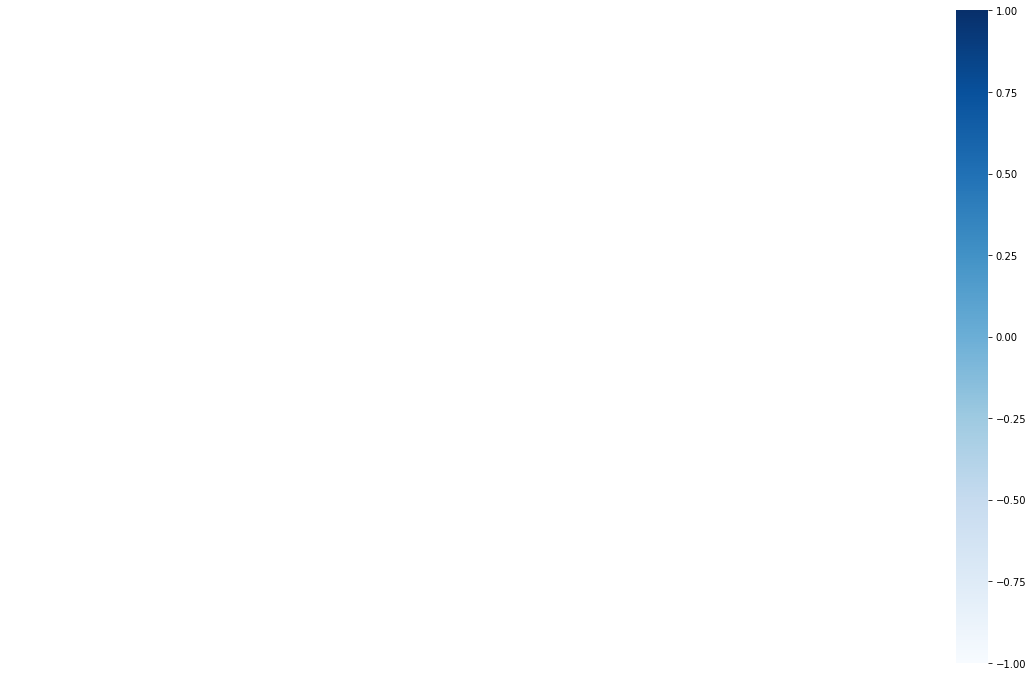

In [27]:
msno.heatmap(cab,cmap="Blues")

In [28]:
cab.shape,cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25867 entries, 0 to 16065
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pickup_datetime    25867 non-null  datetime64[ns]
 1   pickup_longitude   25867 non-null  float64       
 2   pickup_latitude    25867 non-null  float64       
 3   dropoff_longitude  25867 non-null  float64       
 4   dropoff_latitude   25867 non-null  float64       
 5   passenger_count    25867 non-null  float64       
 6   fare_amount        25867 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.6 MB


((25867, 7), None)

In [29]:
cab.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1.0,15.01594
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1.0,15.01594
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1.0,15.01594
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1.0,15.01594
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1.0,15.01594


In [30]:
convert_Data={'passenger_count':'int'}
cab=cab.astype(convert_Data)

In [31]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25867 entries, 0 to 16065
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pickup_datetime    25867 non-null  datetime64[ns]
 1   pickup_longitude   25867 non-null  float64       
 2   pickup_latitude    25867 non-null  float64       
 3   dropoff_longitude  25867 non-null  float64       
 4   dropoff_latitude   25867 non-null  float64       
 5   passenger_count    25867 non-null  int64         
 6   fare_amount        25867 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.6 MB


Outliers


*   1.Fare Amount



In [32]:
cab.loc[cab['fare_amount']<0]                                   

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
2039,2010-03-09 23:37:10,-73.789450,40.643498,-73.788665,40.641952,1,-2.9
2486,2015-03-22 05:14:27,-74.000031,40.720631,-73.999809,40.720539,1,-2.5
13032,2013-08-30 08:57:10,-73.995062,40.740755,-73.995885,40.741357,4,-3.0


In [33]:
cab.loc[cab['fare_amount']<1,'fare_amount']=np.nan                    # Fare Amount must not be negative
cab=cab.dropna()
cab.shape

(25863, 7)

In [34]:
for i in range(1,11):
    print('passenger_count above'+str(i)+'={}'.format(sum(cab['passenger_count']>i)))

passenger_count above1=7693
passenger_count above2=3897
passenger_count above3=2774
passenger_count above4=2240
passenger_count above5=499
passenger_count above6=20
passenger_count above7=20
passenger_count above8=20
passenger_count above9=20
passenger_count above10=20


In [35]:
cab.loc[cab['passenger_count']>6]

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
233,2011-07-24 01:14:35,-73.936141,40.727644,-73.932561,40.712627,236,8.50000
263,2010-07-12 09:44:33,-73.983249,40.734655,-73.991278,40.738918,456,4.90000
293,2011-01-18 23:48:00,-74.006642,40.738927,-74.010828,40.717907,5334,6.10000
356,2013-06-18 10:27:05,-73.992108,40.764203,-73.973000,40.762695,535,8.50000
386,2009-08-21 19:35:05,-73.960853,40.761557,-73.976335,40.748361,354,8.10000
413,2013-09-12 11:32:00,-73.982060,40.772705,-73.956213,40.771777,55,15.01594
971,2010-11-21 01:41:00,-74.004500,40.742143,-73.994330,40.720412,554,10.10000
1007,2010-12-14 14:46:00,-73.969157,40.759000,-73.968763,40.764617,53,3.70000
1043,2012-08-22 22:08:29,-73.973573,40.760184,-73.953564,40.767392,35,5.70000
1107,2009-08-08 21:50:50,-73.988977,40.721068,-73.982368,40.732064,345,4.90000


In [36]:
cab[cab['passenger_count']<1]  

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount


In [37]:
cab=cab.drop(cab[cab['passenger_count']>6].index,axis=0)

In [38]:
sum(cab['passenger_count']>6),cab.shape

(0, (25823, 7))

In [39]:
print('pickup_longitude above 180={}'.format(sum(cab['pickup_longitude']>180)))
print('pickup_longitude below -180={}'.format(sum(cab['pickup_longitude']<-180)))
print('pickup_latitude above 90={}'.format(sum(cab['pickup_latitude']>90)))
print('pickup_latitude below -90={}'.format(sum(cab['pickup_latitude']<-90)))
print('dropoff_longitude above 180={}'.format(sum(cab['dropoff_longitude']>180)))
print('dropoff_longitude below -180={}'.format(sum(cab['dropoff_longitude']<-180)))
print('dropoff_latitude below -90={}'.format(sum(cab['dropoff_latitude']<-90)))
print('dropoff_latitude above 90={}'.format(sum(cab['dropoff_latitude']>90)))

pickup_longitude above 180=0
pickup_longitude below -180=0
pickup_latitude above 90=1
pickup_latitude below -90=0
dropoff_longitude above 180=0
dropoff_longitude below -180=0
dropoff_latitude below -90=0
dropoff_latitude above 90=0


In [40]:
cab=cab.drop(cab[cab['pickup_latitude']>90].index,axis=0)

In [41]:
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(i,'equal to 0={}'.format(sum(cab[i]==0)))

pickup_longitude equal to 0=0
pickup_latitude equal to 0=0
dropoff_longitude equal to 0=0
dropoff_latitude equal to 0=0


In [42]:
cab.isnull().sum(),cab.shape,cab.dtypes

(pickup_datetime      0
 pickup_longitude     0
 pickup_latitude      0
 dropoff_longitude    0
 dropoff_latitude     0
 passenger_count      0
 fare_amount          0
 dtype: int64, (25821, 7), pickup_datetime      datetime64[ns]
 pickup_longitude            float64
 pickup_latitude             float64
 dropoff_longitude           float64
 dropoff_latitude            float64
 passenger_count               int64
 fare_amount                 float64
 dtype: object)

In [43]:
cab.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
count,25821.000000,25821.000000,25821.000000,25821.000000,25821.000000,25821.000000
mean,-73.935899,40.713561,-73.932311,40.712394,1.657914,15.046575
std,2.071224,2.035526,2.111548,2.050426,1.271071,339.289571
min,-74.438233,-74.006893,-74.429332,-74.006377,1.000000,1.140000
25%,-73.992287,40.735397,-73.991210,40.734955,1.000000,7.300000
50%,-73.981977,40.752794,-73.980112,40.753738,1.000000,14.500000
75%,-73.967256,40.767287,-73.963780,40.768340,2.000000,15.015940
max,40.766125,41.709555,40.802437,41.696683,6.000000,54343.000000


<AxesSubplot:ylabel='Density'>

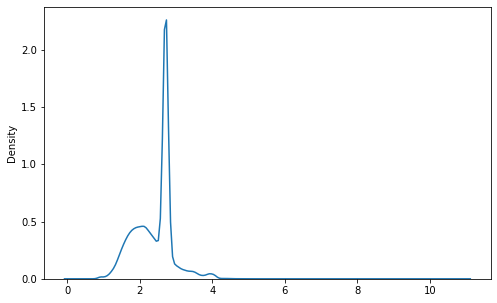

In [44]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(cab['fare_amount'].values))

**Feature Selection**

In [45]:
cab['year']=cab['pickup_datetime'].dt.year
cab['Month']=cab['pickup_datetime'].dt.month
cab['day']=cab['pickup_datetime'].dt.day
cab['DayofWeek']=cab['pickup_datetime'].dt.dayofweek
cab['Hour']=cab['pickup_datetime'].dt.hour
cab["Minute"]=cab['pickup_datetime'].dt.minute

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

<AxesSubplot:xlabel='Minute', ylabel='count'>

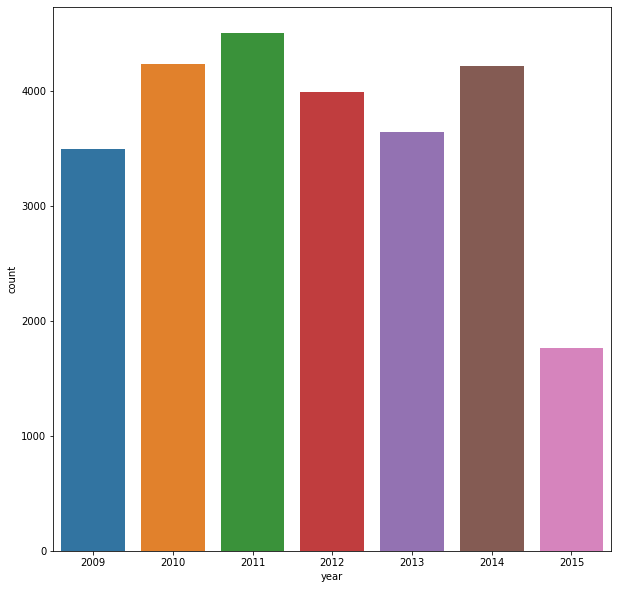

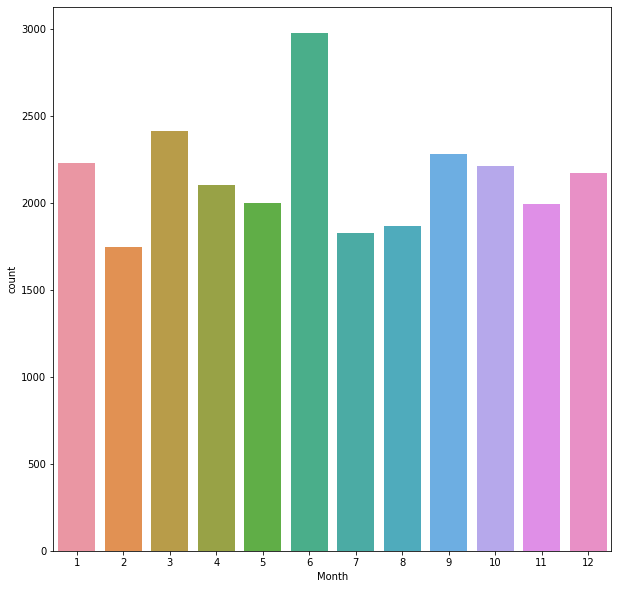

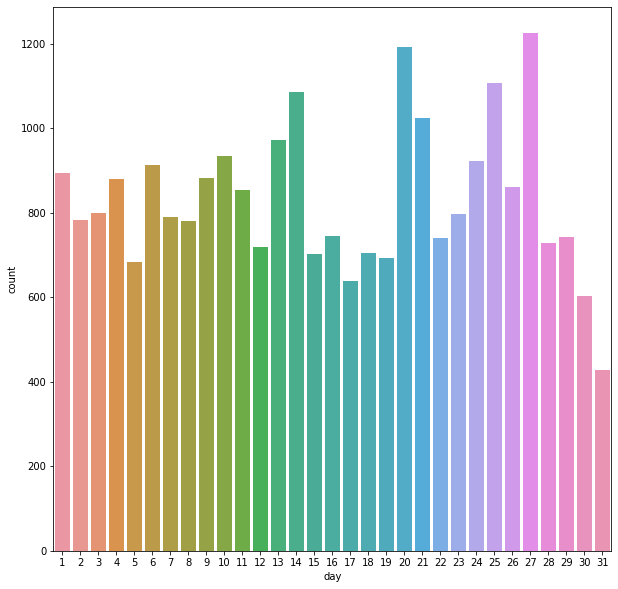

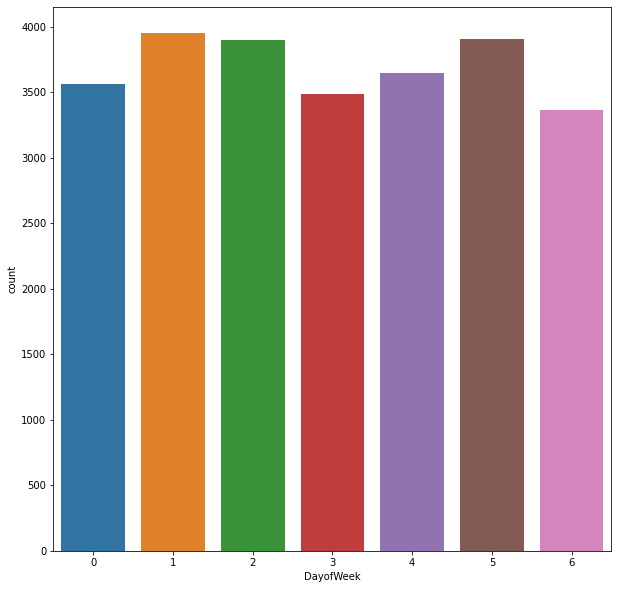

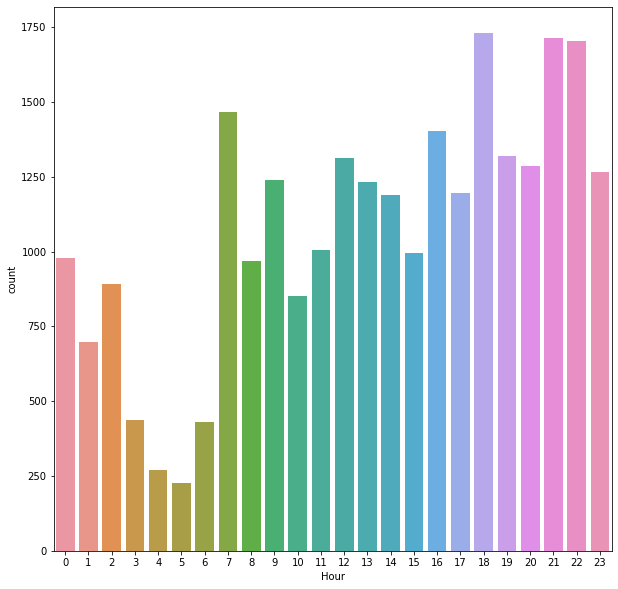

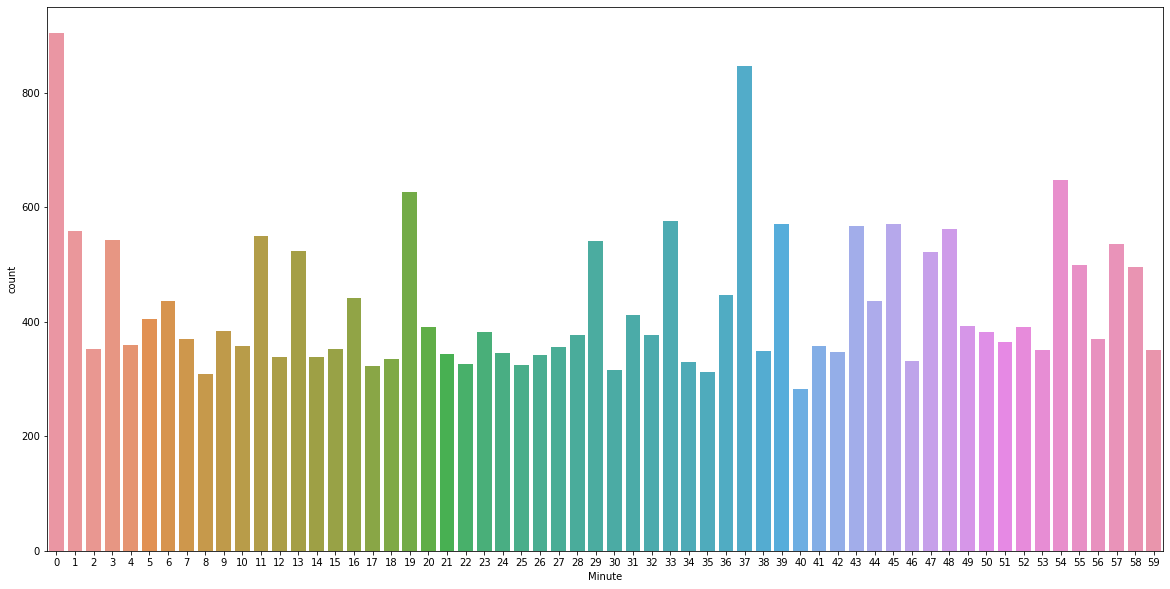

In [46]:
plt.figure(figsize=(10,10))
sns.countplot(cab['year'])

plt.figure(figsize=(10,10))
sns.countplot(cab['Month'])

plt.figure(figsize=(10,10))
sns.countplot(cab['day'])

plt.figure(figsize=(10,10))
sns.countplot(cab['DayofWeek'])

plt.figure(figsize=(10,10))
sns.countplot(cab['Hour'])

plt.figure(figsize=(20,10))
sns.countplot(cab['Minute'])

array([[<AxesSubplot:title={'center':'pickup_datetime'}>,
        <AxesSubplot:title={'center':'pickup_longitude'}>,
        <AxesSubplot:title={'center':'pickup_latitude'}>,
        <AxesSubplot:title={'center':'dropoff_longitude'}>],
       [<AxesSubplot:title={'center':'dropoff_latitude'}>,
        <AxesSubplot:title={'center':'passenger_count'}>,
        <AxesSubplot:title={'center':'fare_amount'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'DayofWeek'}>,
        <AxesSubplot:title={'center':'Hour'}>],
       [<AxesSubplot:title={'center':'Minute'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

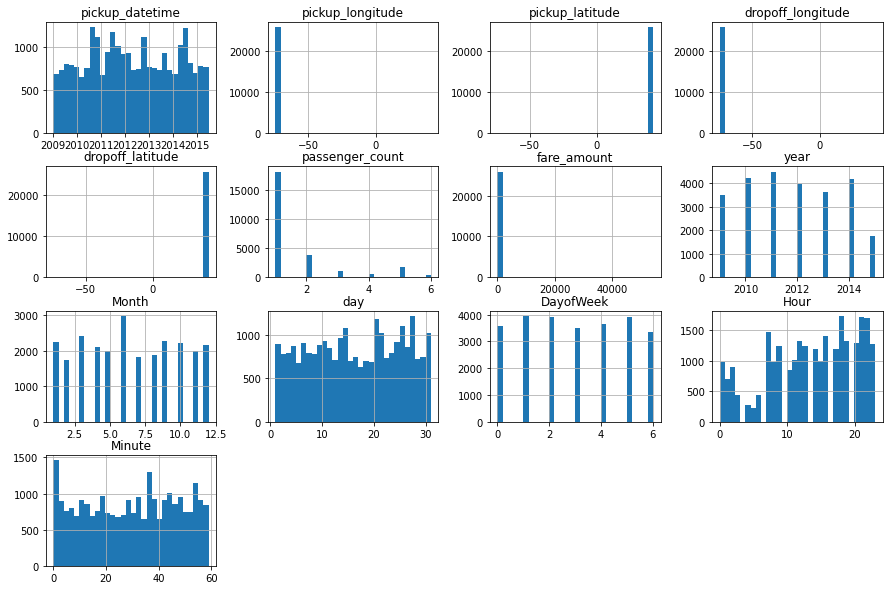

In [47]:
cab.hist(bins=30, figsize=(15, 10))

In [48]:
cab.info(),cab.shape 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25821 entries, 0 to 16065
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pickup_datetime    25821 non-null  datetime64[ns]
 1   pickup_longitude   25821 non-null  float64       
 2   pickup_latitude    25821 non-null  float64       
 3   dropoff_longitude  25821 non-null  float64       
 4   dropoff_latitude   25821 non-null  float64       
 5   passenger_count    25821 non-null  int64         
 6   fare_amount        25821 non-null  float64       
 7   year               25821 non-null  int64         
 8   Month              25821 non-null  int64         
 9   day                25821 non-null  int64         
 10  DayofWeek          25821 non-null  int64         
 11  Hour               25821 non-null  int64         
 12  Minute             25821 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(7)
memory usage: 3.8 

(None, (25821, 13))

Checking if number of passengers effecting fare:

(array([18155.,     0.,  3796.,     0.,  1117.,     0.,   533.,     0.,
         1741.,   479.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

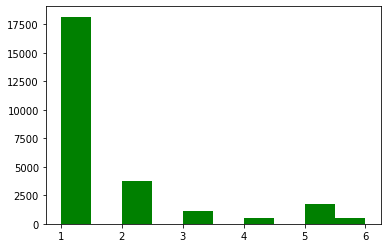

In [49]:
plt.hist(cab['passenger_count'],color='green') 



*   Single passengers are the most frequent travellers



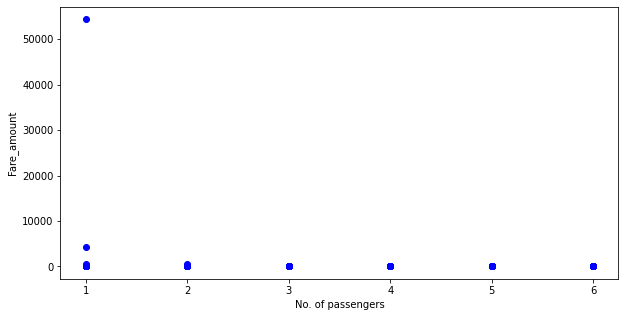

In [50]:
plt.figure(figsize=(10,5))
plt.scatter(x="passenger_count",y="fare_amount", data=cab,color='blue')
plt.xlabel('No. of passengers')
plt.ylabel('Fare_amount')
plt.show()



*  The highest fare seems to come from cabs which carry just 1 passenger.



Checking if data effects the fare

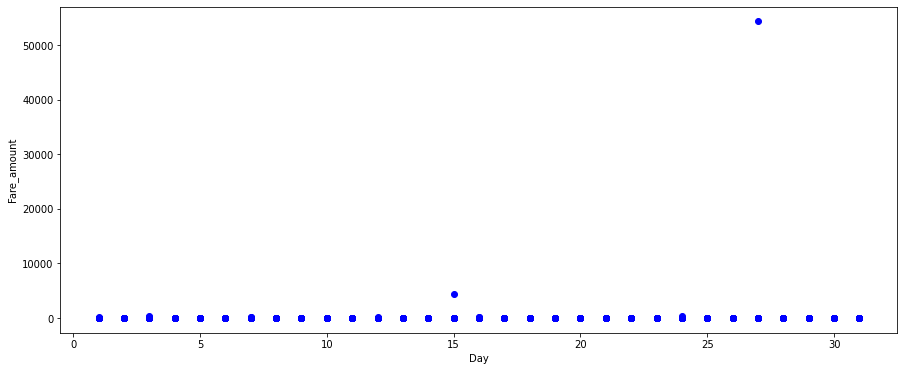

In [51]:
plt.figure(figsize=(15,6))
plt.scatter(x="day",y="fare_amount",data=cab,color='blue')
plt.xlabel('Day')
plt.ylabel('Fare_amount')
plt.show()

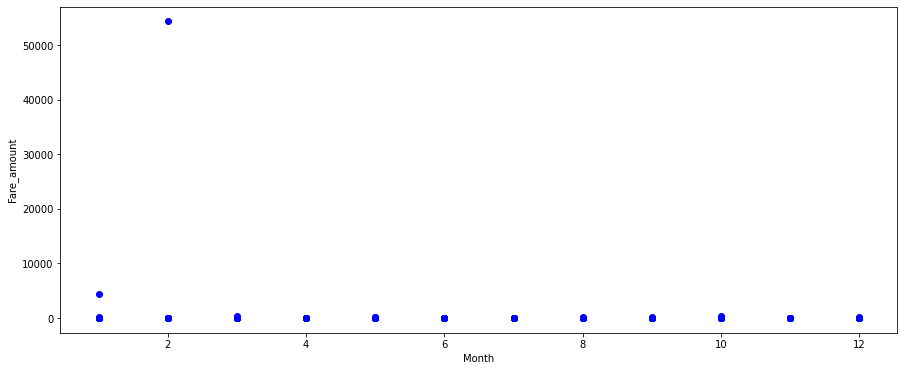

In [52]:
plt.figure(figsize=(15,6))
plt.scatter(x="Month",y="fare_amount",data=cab,color='blue')
plt.xlabel('Month')
plt.ylabel('Fare_amount')
plt.show()




*   The fares throught the date and month mostly seem uniform, with the maximum fare received on the 27th and on 2nd month



Checking if day of week effects the fare:

Text(0, 0.5, 'Frequency')

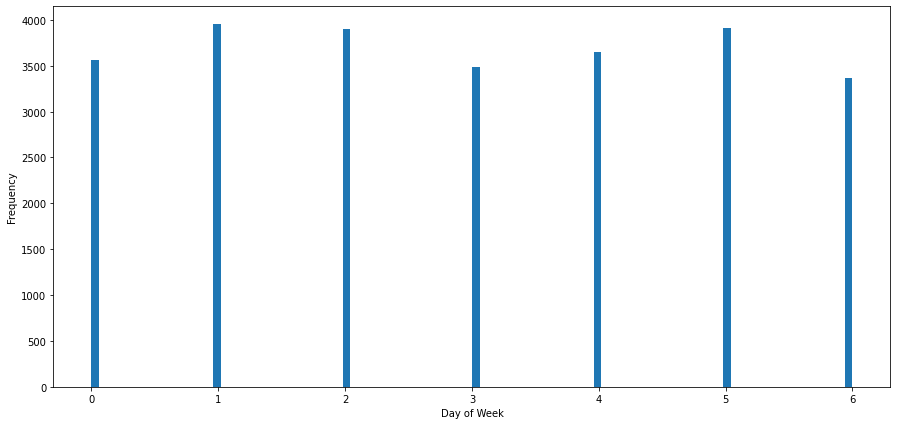

In [53]:
plt.figure(figsize=(15,7))
plt.hist(cab['DayofWeek'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

<AxesSubplot:>

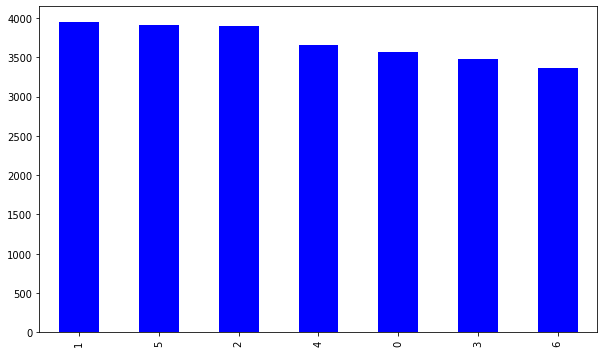

In [54]:
plt.figure(figsize=(10,6))
cab['DayofWeek'].value_counts().plot.bar(color='b')

Text(0, 0.5, 'Fare')

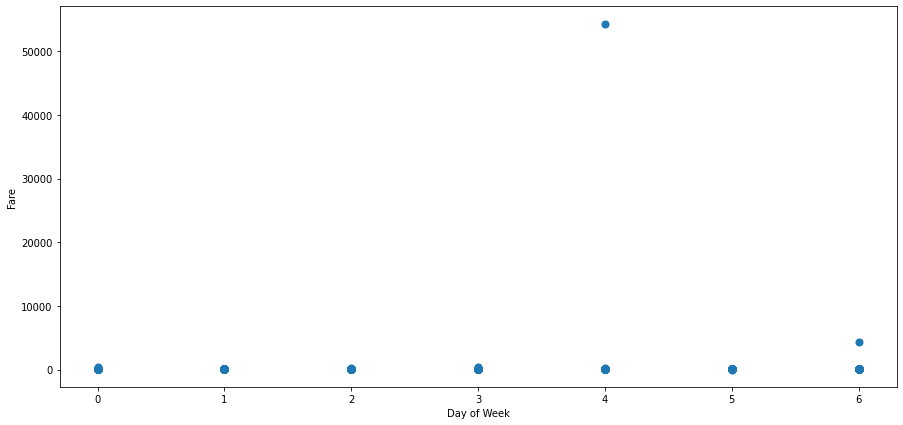

In [55]:
plt.figure(figsize=(15,7))
plt.scatter(x=cab['DayofWeek'], y=cab['fare_amount'], s=50)
plt.xlabel('Day of Week')
plt.ylabel('Fare')


*   The highest fares seem to be on Thursday ,Saturday and the lowest on remaining days



Checking if time effects the fare:

(array([2569.,  706.,  658., 3676., 1859., 2545., 3590., 2928., 2606.,
        4684.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

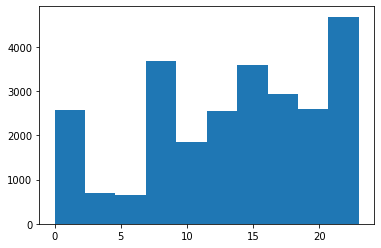

In [56]:
plt.hist(cab["Hour"])

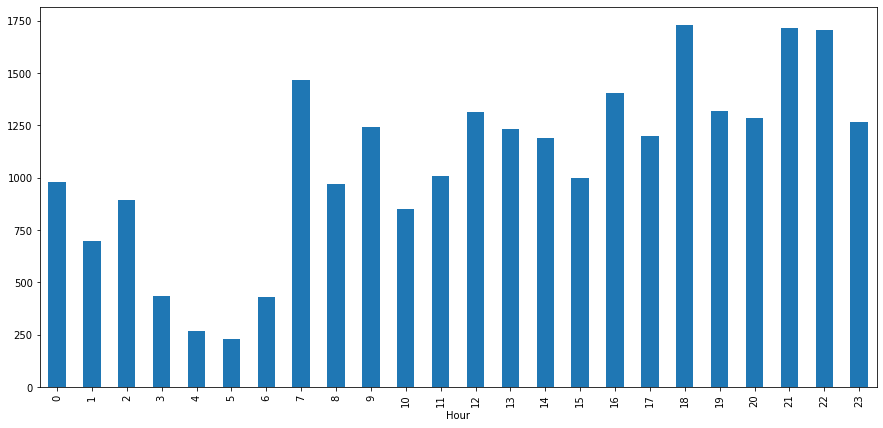

In [57]:
# number of cabs with respect to hours..
plt.figure(figsize=(15,7))
cab.groupby(cab["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

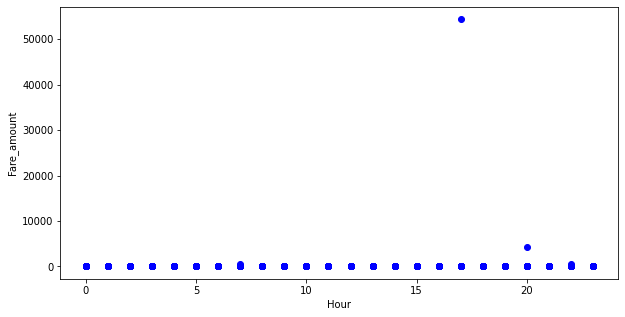

In [58]:
# Relationship between fare and hour
plt.figure(figsize=(10,5))
plt.scatter(x="Hour",y="fare_amount", data=cab,color='blue')
plt.xlabel('Hour')
plt.ylabel('Fare_amount')
plt.show()



*   The frequency of cab rides are highest at 5PM.



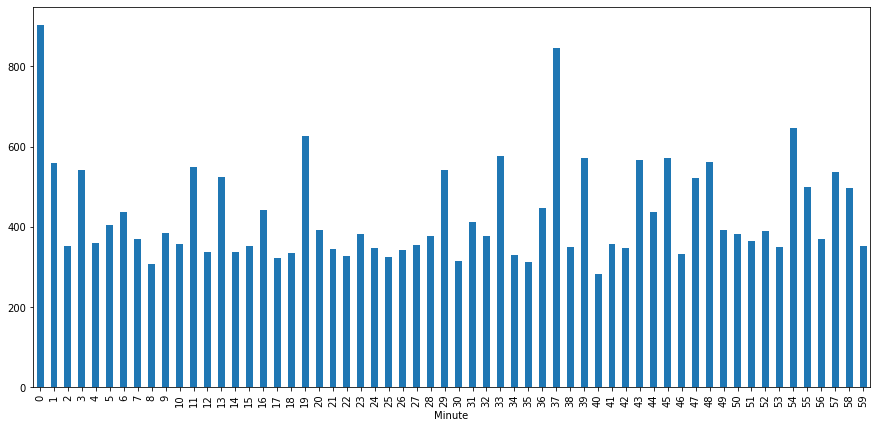

In [59]:
plt.figure(figsize=(15,7))
cab.groupby(cab["Minute"])['Minute'].count().plot(kind="bar")
plt.show()


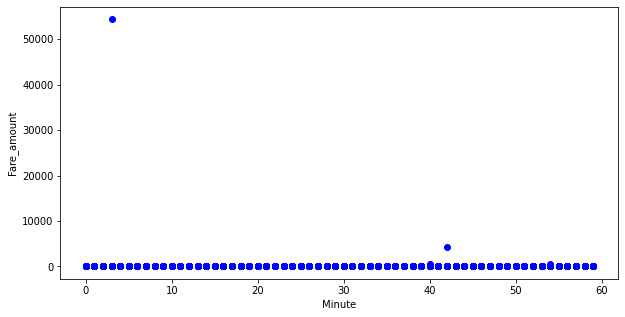

In [60]:
plt.figure(figsize=(10,5))
plt.scatter(x="Minute",y="fare_amount", data=cab,color='blue')
plt.xlabel('Minute')
plt.ylabel('Fare_amount')
plt.show()



*   The highest fare seems to be around 5:00 to 5:05pm




In [61]:
from math import radians, cos, sin, asin, sqrt
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    lon1,lat1,lon2,lat2=map(radians,[lon1, lat1, lon2, lat2])
                                                                                            #haversine formula 
    dlon=lon2-lon1 
    dlat=lat2-lat1 
    a=sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c=2*asin(sqrt(a))
                                                                                    #Radius of earth in kilometers is 6371
    km=6371* c
    return km

In [62]:
cab['distance']=cab[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [63]:
sum(cab['distance']==0)

240

In [64]:
cab=cab.drop(cab[cab['distance']==0].index,axis=0)

In [65]:
sum(cab['distance']==0)

0

Checking if distance effects the fare:

In [67]:
cab.sort_values(['distance','fare_amount'], ascending=False)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,year,Month,day,DayofWeek,Hour,Minute,distance
5864,2012-03-04 01:35:00,-73.995030,40.744945,-7.986640,40.729937,1,8.50,2012,3,4,6,1,35,5420.988959
7014,2011-06-18 04:03:00,-73.988980,40.721697,-74.001073,0.728087,3,4.50,2011,6,18,5,4,3,4447.086698
10710,2011-02-11 21:46:09,-73.955411,39.604164,-73.955647,40.772837,1,3.70,2011,2,11,4,21,46,129.950482
14536,2011-04-03 12:16:46,-73.982155,40.775187,-73.976399,39.610030,1,4.10,2011,4,3,6,12,16,129.560455
11619,2011-05-27 21:47:44,-73.945106,39.603178,-73.976636,40.749643,1,11.30,2011,5,27,4,21,47,127.509261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13488,2010-07-03 00:33:21,-73.996524,40.724844,-73.996525,40.724847,1,2.50,2010,7,3,5,0,33,0.000344
510,2010-10-23 18:39:00,-73.782215,40.644272,-73.782217,40.644270,2,49.57,2010,10,23,5,18,39,0.000279
15366,2010-05-22 13:38:44,-73.776343,40.645167,-73.776342,40.645169,1,50.50,2010,5,22,5,13,38,0.000238
13582,2010-12-17 00:23:00,-73.990255,40.746703,-73.990257,40.746702,1,4.50,2010,12,17,4,0,23,0.000202


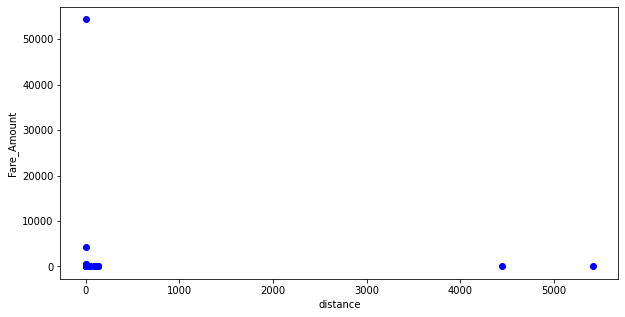

In [68]:
plt.figure(figsize=(10,5))
plt.scatter(x="distance",y="fare_amount", data=cab,color='blue')
plt.xlabel('distance')
plt.ylabel('Fare_Amount')
plt.show()

In [69]:
bins_0 = cab.loc[(cab['distance'] == 0), ['distance']]
bins_1 = cab.loc[(cab['distance'] > 0) & (cab['distance'] <= 10),['distance']]
bins_2 = cab.loc[(cab['distance'] > 10) & (cab['distance'] <= 50),['distance']]
bins_3 = cab.loc[(cab['distance'] > 50) & (cab['distance'] <= 100),['distance']]
bins_4 = cab.loc[(cab['distance'] > 100) & (cab['distance'] <= 200),['distance']]
bins_5 = cab.loc[(cab['distance'] > 200) & (cab['distance'] <= 300),['distance']]
bins_6 = cab.loc[(cab['distance'] > 300),['distance']]
bins_0['bins'] = '0'
bins_1['bins'] = '0-10'
bins_2['bins'] = '11-50'
bins_3['bins'] = '51-100'
bins_4['bins'] = '100-200'
bins_5['bins'] = '201-300'
bins_6['bins'] = '>300'
dist_bins =pd.concat([bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6])
#len(dist_bins)
dist_bins.columns

Index(['distance', 'bins'], dtype='object')

Text(0, 0.5, 'Frequency')

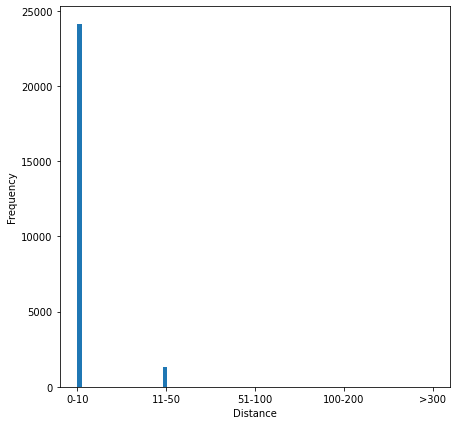

In [70]:
plt.figure(figsize=(7,7))
plt.hist(dist_bins['bins'],bins=75)
plt.xlabel('Distance')
plt.ylabel('Frequency')

In [71]:
cab.shape

(25407, 14)

In [72]:
deletingthefeatures=['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']
cab=cab.drop(deletingthefeatures,axis=1)

In [73]:
cab['passenger_count']=cab['passenger_count'].astype('int64')

cab['year']=cab['year'].astype('int64')
cab['Month']=cab['Month'].astype('int64')
cab['day']=cab['day'].astype('int64')
cab['DayofWeek']=cab['DayofWeek'].astype('int64')
cab['Hour']=cab['Hour'].astype('int64')
cab['Minute']=cab['Minute'].astype('int64')


cab.dtypes

passenger_count      int64
fare_amount        float64
year                 int64
Month                int64
day                  int64
DayofWeek            int64
Hour                 int64
Minute               int64
distance           float64
dtype: object

In [74]:
n=['fare_amount','year','Month','day','DayofWeek','Hour','Minute','passenger_count','distance']
cab_corr=cab.loc[:,n]

<AxesSubplot:>

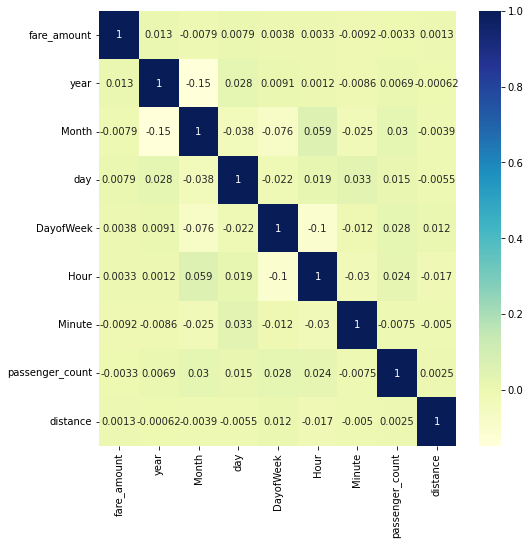

In [75]:
plt.figure(figsize=(8,8))                                            
sns.heatmap(cab_corr.corr(),cmap="YlGnBu",annot=True)

In [76]:
cab.head(20)

,passenger_count,fare_amount,year,Month,day,DayofWeek,Hour,Minute,distance
0,1,15.01594,2015,1,27,1,13,8,2.323259
1,1,15.01594,2015,1,27,1,13,8,2.425353
2,1,15.01594,2011,10,8,5,11,53,0.618628
3,1,15.01594,2012,12,1,5,21,12,1.961033
4,1,15.01594,2012,12,1,5,21,12,5.387301
5,1,15.01594,2012,12,1,5,21,12,3.222549
6,1,15.01594,2011,10,6,3,12,10,0.929601
7,1,15.01594,2011,10,6,3,12,10,21.540102
8,1,15.01594,2011,10,6,3,12,10,3.873962
9,1,15.01594,2014,2,18,1,15,22,1.099794


In [77]:
cab.shape,cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25407 entries, 0 to 16065
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  25407 non-null  int64  
 1   fare_amount      25407 non-null  float64
 2   year             25407 non-null  int64  
 3   Month            25407 non-null  int64  
 4   day              25407 non-null  int64  
 5   DayofWeek        25407 non-null  int64  
 6   Hour             25407 non-null  int64  
 7   Minute           25407 non-null  int64  
 8   distance         25407 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 1.9 MB


((25407, 9), None)

In [78]:
cab=cab[['fare_amount','passenger_count','year','Month','day','DayofWeek', 'Hour','Minute','distance']]
cab.tail()

,fare_amount,passenger_count,year,Month,day,DayofWeek,Hour,Minute,distance
16061,10.9,1,2009,5,20,2,18,56,3.357490
16062,6.5,1,2014,12,12,4,7,41,0.850044
16063,16.1,2,2009,7,13,0,7,58,7.867638
16064,8.5,1,2009,11,11,2,11,19,1.469105
16065,8.1,1,2010,5,11,1,23,53,2.590036


**Splitting as input and output**

In [79]:
X=cab.drop('fare_amount',axis=1).values
Y=cab['fare_amount'].values

In [80]:
X.shape,Y.shape

((25407, 8), (25407,))

In [81]:
X_train,X_test,y_train,y_test=train_test_split(cab.iloc[:,cab.columns != 'fare_amount'],cab.iloc[:, 0],test_size=0.30,random_state=1)
print(cab.shape,X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(25407, 9) (17784, 8) (17784,) (7623, 8) (7623,)


In [82]:
from sklearn.feature_selection import SelectFromModel

In [83]:
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
sel_.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [84]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

**Model development**

1.Linear regression

In [85]:
model=LinearRegression()
model.fit(X_train,y_train)
pred_train=model.predict(X_train)
pred_test=model.predict(X_test)
RMSE_test=np.sqrt(mean_squared_error(y_test,pred_test))
RMSE_train= np.sqrt(mean_squared_error(y_train,pred_train))               
print("Root Mean Squared Error For Train data = "+str(RMSE_train))
print("Root Mean Squared Error For Test data = "+str(RMSE_test))
#lrmodel.summary()

Root Mean Squared Error For Train data = 408.656604251604
Root Mean Squared Error For Test data = 13.485295876215314


In [86]:
r2_score(y_train, pred_train),r2_score(y_test, pred_test)

(0.0005454663671680127, -1.1013039803177298)

In [87]:
model.score(X_train,y_train)*100                                                       # score - 0% 

0.05454663671680127

2. Decision Tree Model

In [88]:
dt=DecisionTreeRegressor().fit(X_train,y_train)

In [89]:
pred_train_dt=dt.predict(X_train)
pred_test_dt=dt.predict(X_test)
RMSE_train_dt= np.sqrt(mean_squared_error(y_train, pred_train_dt))
RMSE_test_dt= np.sqrt(mean_squared_error(y_test, pred_test_dt))
print("Root Mean Squared Error For Training data = "+str(RMSE_train_dt))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_dt)) 

Root Mean Squared Error For Training data = 4.152860697011897e-15
Root Mean Squared Error For Test data = 9.111729727151051


In [90]:
r2_score(y_train, pred_train_dt),r2_score(y_test, pred_test_dt)

(1.0, 0.040666561837307436)

In [91]:
dt.score(X_train,y_train)*100                                                         # score - 100%

100.0

3.Random Forest Model

In [92]:
rf= RandomForestRegressor().fit(X_train,y_train)
pred_train_rf=rf.predict(X_train)
pred_test_rf=rf.predict(X_test)
RMSE_train_rf=np.sqrt(mean_squared_error(y_train, pred_train_rf))
RMSE_test_rf= np.sqrt(mean_squared_error(y_test, pred_test_rf))
print("Root Mean Squared Error For Training data = "+str(RMSE_train_rf))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_rf))
print(r2_score(y_train, pred_train_rf))
print(r2_score(y_test, pred_test_rf))
rf.score(X_train,y_train)*100                                                         # score - 80%

Root Mean Squared Error For Training data = 181.78296944907845
Root Mean Squared Error For Test data = 34.8832149224101
0.8022336558586451
-13.060505397813946


80.22336558586451

4 .Gradient Boosting Regression

In [93]:
gb=GradientBoostingRegressor().fit(X_train,y_train)
pred_train_gb=gb.predict(X_train)
pred_test_gb=gb.predict(X_test)
RMSE_train_gb=np.sqrt(mean_squared_error(y_train, pred_train_gb))
RMSE_test_gb= np.sqrt(mean_squared_error(y_test, pred_test_gb))
print("Root Mean Squared Error For Training data = "+str(RMSE_train_gb))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_gb))

Root Mean Squared Error For Training data = 14.77097359321351
Root Mean Squared Error For Test data = 9.46504885816452


In [106]:
print(r2_score(y_test, pred_test_gb),r2_score(y_train,pred_train_gb))
gb.score(X_train,y_train)*100                                                         # score - 99.86%

-0.0351746881741104 0.9986942373496613


99.86942373496613

5.SVR

In [107]:
sv=SVR(kernel = 'rbf')
sv.fit(X_train,y_train)
pred_train_sv=sv.predict(X_train)
pred_test_sv=sv.predict(X_test)
RMSE_train_sv=np.sqrt(mean_squared_error(y_train, pred_train_sv))
RMSE_test_sv= np.sqrt(mean_squared_error(y_test, pred_test_sv))
print("Root Mean Squared Error For Training data = "+str(RMSE_train_sv))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_sv))                  # score - negative
print(r2_score(y_train, pred_train_sv))
print(r2_score(y_test, pred_test_sv))
sv.score(X_train,y_train)*100 

Root Mean Squared Error For Training data = 408.7695379765616
Root Mean Squared Error For Test data = 9.416299532494863
-7.015685212552469e-06
-0.024538903351262853


-0.0007015685212552469

In [108]:
import pickle
with open("cabfare.pkl",'wb') as f:
  pickle.dump(dt,f)
dt_model=pickle.load(open("cabfare.pkl","rb"))


In [109]:
dt_model.predict([[1,2009,5,20,2,18,56,3.357490]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([10.5])

In [105]:
print(dt_model.predict([[2,2009,7,13,0,7,58,7.867638]]))

[16.1]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [110]:
print(dt_model.predict([[1,2009,11,11,2,11,19,1.469105]]))

[8.5]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [111]:
print(dt_model.predict([[1,2010,5,11,1,23,53,2.590036]]))

[8.1]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [112]:
EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Linear Regression (model)',Decision Tree Regressor(dt)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

NameError: ignored

In [ ]:
R2 = EMC['Train-R2'].sort_values(ascending=True)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()